In [1]:
import os, torch
# from PIL import Image
from kolors.pipelines.pipeline_stable_diffusion_xl_chatglm_256 import StableDiffusionXLPipeline
from kolors.models.modeling_chatglm import ChatGLMModel
from kolors.models.tokenization_chatglm import ChatGLMTokenizer
from diffusers import UNet2DConditionModel, AutoencoderKL
from diffusers import EulerDiscreteScheduler

/root/miniconda3/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [3]:
# Kolors Model Path
KMP = "/data/model/weights/Kolors"
# load models
text_encoder = ChatGLMModel.from_pretrained(f"{KMP}/text_encoder", torch_dtype=torch.float16).half()
tokenizer = ChatGLMTokenizer.from_pretrained(f'{KMP}/text_encoder')
vae = AutoencoderKL.from_pretrained(f"{KMP}/vae", revision=None).half()
scheduler = EulerDiscreteScheduler.from_pretrained(f"{KMP}/scheduler")
unet = UNet2DConditionModel.from_pretrained(f"{KMP}/unet", revision=None).half()

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
# sd pipeline
pipe = StableDiffusionXLPipeline(
            vae=vae,
            text_encoder=text_encoder,
            tokenizer=tokenizer,
            unet=unet,
            scheduler=scheduler,
            force_zeros_for_empty_prompt=False)
pipe = pipe.to("cuda")
pipe.enable_model_cpu_offload()

In [5]:
# generate
def gen(prompt, height=1024, width=1024,
        num_inference_steps=50, guidance_scale=5.0, num_images_per_prompt=1,
        generator= torch.Generator(pipe.device).manual_seed(66)):
    return pipe(prompt=prompt, height=height, width=width, num_inference_steps=num_inference_steps,
                guidance_scale=guidance_scale, num_images_per_prompt=num_images_per_prompt, generator=generator)

  0%|          | 0/50 [00:00<?, ?it/s]

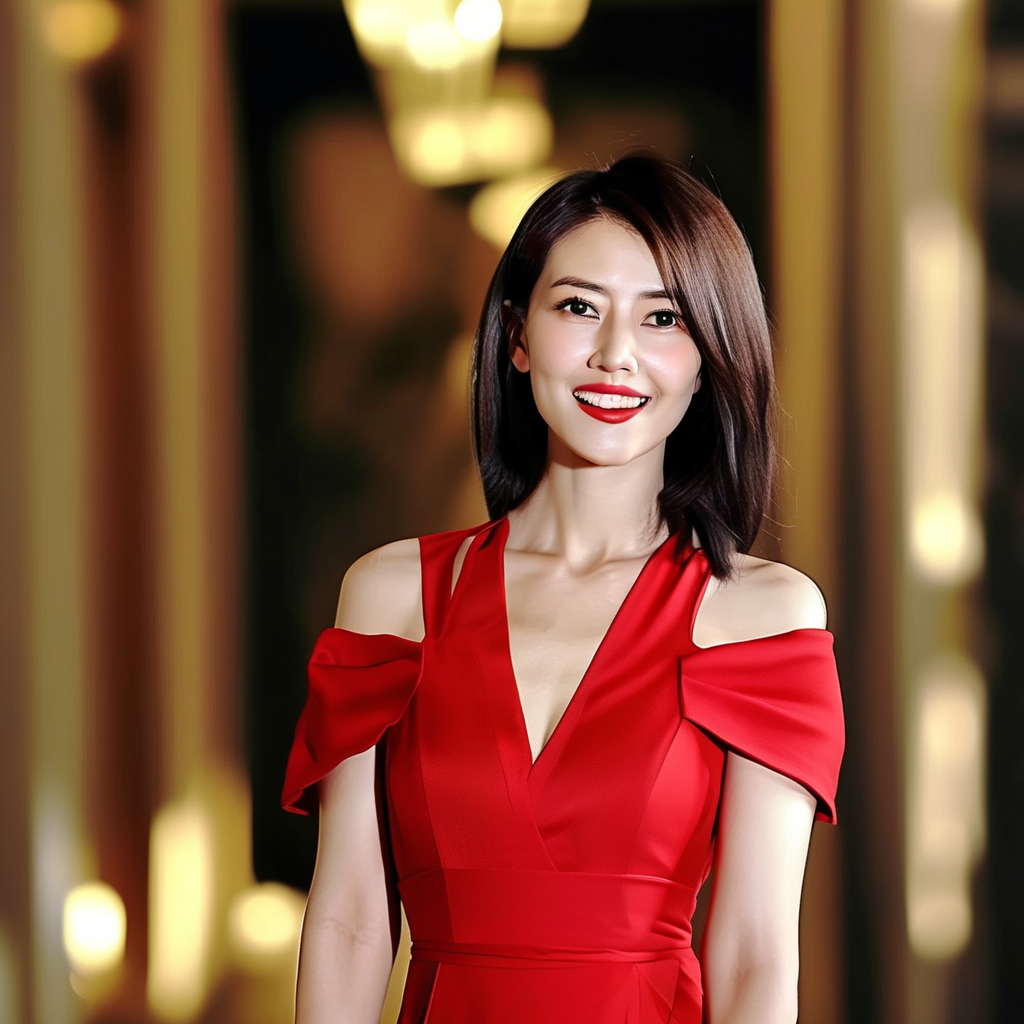

In [19]:
# testing
gen(prompt="高圆圆，高质量，聚焦，细节，细腻，红色嫁衣，笑容灿烂").images[0].show()